# Minería de datos

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Práctica Final Minería de Datos</h2>

## Docentes

 - José Francisco Diez Pastor
 
## Estudiantes

- Rodrigo Pascual García
- Roberto Martínez - Guisasola Guerrero

## Descripción de la práctica

Tenemos un conjunto de datos de pacientes que han acudido a una consulta de un Servicio de Cardiología. En total son más de 69.000 pacientes y para cada uno de ellos tenemos 12 atributos. Estos datos han sido extraidos de <a href = "https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection?select=cardio_train.csv">Kaggle</a>.<br>
Se desea predecir si el paciente tiene una enfermedad cardíaca o no.

### Descripción de los atributos
Los atributos del conjuto de datos son:
- Edad: valor objetivo que indica los días de vida del paciente. Es un valor numérico
- Altura: altura del paciente medida en centímetros. Es un valor numérico
- Peso: peso del paciente medido en kilogramos. Es un valor numérico
- Sexo: sexo del paciente. Es un atributo binario. 1: Hombre, 2: Mujer
- PSis: presión sistólica del paciente medida en la consulta durante la exploración médica. Es un valor numérico expresado en mmHg
- PDia: presión diastólica del paciente medida en la consulta durante la exploración médica. Es un valor numérico expresado en mmHg
- Colesterol: indica el estado de los niveles de colesterol obtenidos en un análisis sanguíneo. Es un atributo categórico. 1:Normal, 2: Alto, 3: Muy alto
- Glucosa: indica el estado de los niveles de glucosa obtenidos mediante una prueba de glucosa en sangre. Es un atributo categórico. 1:Normal, 2: Alto, 3: Muy alto
- Fumador: atributo que indica si el paciente fuma o no. Es un atributo binario. 0: No, 1: Sí
- Alcohol: atributo que indica si el paciente consume alcohol de manera abundante. Es un atributo binario. 0: No, 1: Sí
- Act_fisica: atributo que indica si el paciente realiza actividad física de manera regular. Es un atributo binario. 0: No, 1: Sí

#### La clase
- Cardio: presencia o ausencia de enfermedad cardiovascular. Es la variable que se quiere predecir. Es un atributo binario. 

## Vídeo explicativo de la práctica
Youtube:  <a href="https://youtu.be/uo0auxwIruc">Haga clic aquí</a> para ver en vídeo a través de YouTube</br>
OneDrive: <a href="https://universidaddeburgos-my.sharepoint.com/:v:/g/personal/rmg1022_alu_ubu_es/ER0_ntABx0dNoqYluqFH_BkBLW1PxTOcYxV9esk-Daseww?e=Azpk4G">Haga clic aquí</a> para ver en vídeo a través de OneDrive

<a id="index"></a>
## Tareas realizadas

1. [Carga y visualización de los datos](#1)
2. [Limpieza de datos](#2)
3. [Información sobre las columnas y calcular estadísticas](#3)
4. [Tratamiento de valores missing](#4)
5. [Visualización de estadísticas](#5)
6. [Almacenamiento de los resultados](#6)
7. [Creación de diferentes experimentos](#7)
8. [Evaluación de la precisión de los modelos](#8)
9. [Matríz de confusión](#9)
10. [Tasa de acierto de los modelos](#10)

### Carga y visualización de los datos <a id="1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Es la primera etapa. Vamos a cargar el conjunto de datos disponible en el fichero local `cardio_train.csv` y, puesto que se encuentra en inglés, vamos a poner el nombre de las columnas en castellano. Para ello hemos empleado la función `load_data` <br>
También hemos creado nuestra propia función `mostrar_cabecera`, que muestra la cabecera del conjunto de datos y tantas filas como se le indique

In [1]:
import pandas as pd
import os
import numpy as np

def load_data(url):
    """
    Función que recibe una url (direccion del equipo con los datos en formato csv) y devuelve un Dataframe con los datos. Las cabeceras de las columnas son eliminadas y se ponen en castellano automáticamente al ser importadas

    Parámetros:
    ----------    
        url : string
            Dirección del fichero a cargar. No tiene ningún valor por defecto.

    Returns:
    ----------    
        DataFrame (df): devuelve un DataFrame con los datos del fichero proporcionado.
    """
    dataframe = pd.read_csv(url, sep = ';')
    columnas = list(dataframe.columns.values)
    print(f"El conjunto de datos se ha importado. Las columnas originales ({columnas}) se encuentran en inglés. Las columnas van a ser traducidas al castellano")
    columnasNuevas = ['Id', 'Edad', 'Sexo', 'Altura', 'Peso', 'PSis', 'PDia', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Act_fisica', 'Cardio']
    dataframe.columns = columnasNuevas
    print(f"Columnas traducidas al castellano. Columnas actuales: {columnasNuevas}")
    procesado = False  
    return dataframe, procesado

def mostrar_cabecera(df, n):
    """
    Recibe un DataFrame de los datos y devuelve un DataFrame formado por las n primeras columnas.

    
    Parameters
    ----------    
        df : DataFrame
            DataFrame del cual se quieren mostrar las 10 primeras filas. No tiene ningún valor por defecto.
        
        n : int
            Número de filas del Da
            taFrame que se quieren mostrar.

    Returns
    ----------    
        Muestra las n primeras filas del DataFrame proporcionado.
    """
    print(f"A continuación, se muestran las {n} primeras filas del conjunto de datos")
    display(df.head(n=n))

url = "."+os.sep+"data"+os.sep+"cardio_train.csv"
df, procesado = load_data(url)
mostrar_cabecera(df, 10)

El conjunto de datos se ha importado. Las columnas originales (['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']) se encuentran en inglés. Las columnas van a ser traducidas al castellano
Columnas traducidas al castellano. Columnas actuales: ['Id', 'Edad', 'Sexo', 'Altura', 'Peso', 'PSis', 'PDia', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Act_fisica', 'Cardio']
A continuación, se muestran las 10 primeras filas del conjunto de datos


,Id,Edad,Sexo,Altura,Peso,PSis,PDia,Colesterol,Glucosa,Fumador,Alcohol,Act_fisica,Cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


### Limieza de datos
Para poder obtener la mejor solución y que el programa sea capaz de diagnosticar con la mayor precisión, es necesario que dispongamos de datos precisos. Hay ciertos valores que pueden ser erróneos o que estén mal introducidos debido a un error humano <br>
Para realizar esta limpieza de los datos hemos usado la función `limpieza_datos`, que realiza las siguientes acciones:

- Id: borramos la columna
- Edad: pasaremos de dias a años	
- Altura: borraremos esta columna, ya que se reflejará en el IMC
- Peso:	borraremos esta columna, ya que se reflejará en el IMC
- PSis: haremos nulos los valores que no sean posibles	
- PDia: haremos nulos los valores que no sean posibles

Para evitar errores en el programa, si el DataFrame ya había sido procesado, de manera que hay columnas que ya no existen, la función no realiza las anteriores acciones y muestra la frase `El DataFrame ya ha sido procesado`

In [2]:
def limpieza_datos(df, procesado):
    '''
    Función que recibe un DataFrame y devuelve un Dataframe con el IMC calculado y las columnas referentes al peso y a la altura eliminadas.

    
    Parameters
    ----------    
        df : DataFrame
            DataFrame del cual se quieren procesar los datos y calcular el IMC de los pacientes. No tiene ningún valor por defecto.

    Returns
    ----------    
        DataFrame (df): devuelve un DataFrame con los datos calculados y las columnas referentes al peso y a la altura eliminadas.
    '''
    if not procesado:
        #Edad: pasaremos de dias a años
        df['EDAD'] = (df.Edad/365)
        df.drop(['Edad'], axis=1, inplace = True)
        
        #Altura y peso: usaremos este dato para calcular el Indice de masa corporal y lo borraremos
        df['BMI'] = (df.Peso/((df.Altura/100)**2))
        df.drop(['Altura', 'Peso'], axis=1, inplace = True)
        
        #Id: Borrado
        df.drop(['Id'], axis=1, inplace = True)
        
        #Correción valores de presón
        df.loc[~df['PSis'].between(55, 300), 'PSis'] = np.nan
        df.loc[~df['PDia'].between(30, 150), 'PDia'] = np.nan
        
        #correción valores de BMI
        df.loc[~df['BMI'].between(10, 50), 'BMI'] = np.nan
        
        df = df[['EDAD', 'Sexo', 'BMI', 'PSis', 'PDia', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Act_fisica','Cardio']]
        columnasNuevas = ['Edad', 'Sexo', 'IMC', 'PSis','PDia','Colesterol','Glucosa','Fumador','Alcohol', 'Act_fisica','Cardio']
        df.columns = columnasNuevas

        procesado = True
    else:
        print("El DataFrame ya ha sido procesado")
    
    return round(df,2), procesado

df, procesado = limpieza_datos(df, procesado)
mostrar_cabecera(df, 7)

A continuación, se muestran las 7 primeras filas del conjunto de datos


,Edad,Sexo,IMC,PSis,PDia,Colesterol,Glucosa,Fumador,Alcohol,Act_fisica,Cardio
0,61.56,1,28.72,130.0,80.0,2,2,0,0,1,0
1,40.13,1,26.72,110.0,70.0,1,1,0,0,1,1
2,60.00,1,25.71,120.0,80.0,1,1,0,0,1,0
3,39.86,2,31.22,120.0,80.0,1,1,1,1,1,0
4,64.09,1,25.81,120.0,80.0,1,1,0,0,1,0
5,57.93,1,22.68,100.0,70.0,1,1,0,0,1,0
6,49.55,1,27.43,100.0,70.0,1,1,0,0,1,0


### Información sobre las columnas y calcular estadísticas
Es importante conocer la información que hay en cada columna, así como sus estadísticas. Para ello, hemos creado una función llamada `informacionColumnas`, que proporciona información acerca del número de filas y columnas del DataFrame. Esta función también muestra el número de ejemplos que hay en cada uno de los posibles valores de un listado de columnas proporcionado, gracias a la función `datosColumna`. Por defecto, muestra la información de la columna `Cardio`<br>

Una vez conocidos los valores de las columnas deseadas, mostramos las estadisticas de cada columna del DataFrame con la función `mostrarEstadisticas`. Esta función recibe el DataFrame y un listado de estadísticas que se quieren mostrar. También indica el número de valores nulos que hay en una columna. Todos estos valores son redondeados con dos decimales 

In [3]:
def informacionColumnas(df, lColumnas = ["Cardio"]):
    """
    Recibe el DataFrame de los datos y un listado de columnas y muestra el número de filas y columnas y cuantos ejemplos hay en cada una de las clases de cada columna.
    
    
    Parameters
    ----------    
        df : DataFrame
            DataFrame del cual se quiere conocer la información. No tiene ningún valor por defecto.

        class_name : list
            Listado de columnas de las cuales se quiere obtener sus estadísticas.

    Returns
    ----------    
        Muestra el número de filas y columnas del DataFrame proporcionado.\n
        Además, indica el número de ejemplos que pertenecen a cada valor de cada columna, en diferentes líneas.
    """
        
    filas = len(df.index)
    columnas = len(df.columns)
    datos = f"El dataset está formado por {filas} filas y {columnas} columnas. \nA continuación, se muestran unas estadísticas de cada columna empleada:\n"
    for i in lColumnas:
        datos = datos + datosColumna(df, i)
    print(datos)
    

def datosColumna(df,columna):
    """
    Recibe el DataFrame de los datos y el nombre de una columna y devuelve un string con el número de ejemplos que hay en cada uno de los posibles valores de la columna y algunos valores estadísticos.
    
    
    Parameters
    ----------    
        df : DataFrame
            DataFrame del cual se quiere conocer la información. No tiene ningún valor por defecto.

        columna : string
            Nombre de la columna de la cual se quiere conocer cuántos ejemplos pertenecen a cada clase. No tiene ningún valor por defecto.

    Returns
    ----------    
        String (estadisticas): string con las estadisticas de cada columna.\n
    """
    estadisticas = f"En la columna {columna} hay "
    media = 0 
    ejemplos = df.groupby(columna).size()
    for i in ejemplos.index:
        estadisticas = estadisticas  + str(ejemplos[i]) + " ejemplos de la clase " + str(i) + ", "
        media = media + (i*ejemplos[i])/len(df.index)
    estadisticas = estadisticas + "tiene un valor medio de " + str(media) + "\n"
    return estadisticas

In [4]:
def mostrarEstadisticas(df, valores):
    """
    Muestra estadísticas básicas de un DataFrame y el número de missings.
    
    
    Parameters
    ----------    
        df : DataFrame
            DataFrame del cual se quiere conocer la información. No tiene ningún valor por defecto.
    
    Returns
    ----------    
        DataFrame con las estadísticas del dataFrame proporcionado.
    """
    estadisticas = df.describe()
    estadisticas = estadisticas.transpose()
    df_stats = estadisticas[valores]
    nulos = (df.isna()).sum()
    df_stats['Nº nulos']=nulos
    return round(df_stats,2)
    

In [5]:
columnas = ["Cardio", "Glucosa"]
informacionColumnas(df, columnas)
valoresEstadisticas = ['count', 'mean', 'std', 'min', 'max']
mostrarEstadisticas(df, valoresEstadisticas)

El dataset está formado por 69301 filas y 11 columnas. 
A continuación, se muestran unas estadísticas de cada columna empleada:
En la columna Cardio hay 34679 ejemplos de la clase 0, 34622 ejemplos de la clase 1, tiene un valor medio de 0.4995887505230805
En la columna Glucosa hay 58885 ejemplos de la clase 1, 5139 ejemplos de la clase 2, 5277 ejemplos de la clase 3, tiene un valor medio de 1.2264469488174774



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7348\467963485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['Nº nulos']=nulos


,count,mean,std,min,max,Nº nulos
Edad,69301.0,53.34,6.76,29.58,64.97,0
Sexo,69301.0,1.35,0.48,1.00,2.00,0
IMC,69057.0,27.41,5.06,10.73,50.00,244
PSis,69074.0,126.99,17.09,60.00,240.00,227
PDia,68283.0,81.35,9.57,30.00,150.00,1018
Colesterol,69301.0,1.37,0.68,1.00,3.00,0
Glucosa,69301.0,1.23,0.57,1.00,3.00,0
Fumador,69301.0,0.09,0.28,0.00,1.00,0
Alcohol,69301.0,0.05,0.23,0.00,1.00,0
Act_fisica,69301.0,0.80,0.40,0.00,1.00,0


### Tratamiento de valores missing
Los valores desconocidos son un problema a la hora de emplear algoritmos de clasificación, por ello vamos a sustituirlos por la media. De esta forma, el valor medio de cada columna no se verá afectado y se evitará que la toma de decisiones por parte del algoritmo sí que se modifique. Para reemplazar los valores missing hemos empleado la función `eliminarMissings`

In [7]:
def eliminarMissings(df):
    '''
    Función que recibe un DataFrame y devuelve un Dataframe con los valores missing sustituidos por la media.


    Parameters
    ----------    
        df : DataFrame
            DataFrame del cual se quieren corregir los valores missing. No tiene ningún valor por defecto.

    Returns
    ----------    
        DataFrame (df): devuelve un DataFrame con los valores missing corregidos.

    '''
    if (df.isna()).sum().sum() != 0:
        #Recorremos los nombres de las columnas del dataframe
        for i in df.columns:
        #Para cada columna rellenamos los valores Na con la media de la columna
            df[i].fillna(df[i].mean(skipna = True), inplace=True)
    return df

display(mostrarEstadisticas(df, valoresEstadisticas))
df = eliminarMissings(df)
mostrar_cabecera(df, 18)
display(mostrarEstadisticas(df, valoresEstadisticas))


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7348\467963485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['Nº nulos']=nulos


,count,mean,std,min,max,Nº nulos
Edad,69301.0,53.34,6.76,29.58,64.97,0
Sexo,69301.0,1.35,0.48,1.00,2.00,0
IMC,69301.0,27.41,5.06,10.73,50.00,0
PSis,69301.0,126.99,17.07,60.00,240.00,0
PDia,69301.0,81.35,9.50,30.00,150.00,0
Colesterol,69301.0,1.37,0.68,1.00,3.00,0
Glucosa,69301.0,1.23,0.57,1.00,3.00,0
Fumador,69301.0,0.09,0.28,0.00,1.00,0
Alcohol,69301.0,0.05,0.23,0.00,1.00,0
Act_fisica,69301.0,0.80,0.40,0.00,1.00,0


A continuación, se muestran las 18 primeras filas del conjunto de datos


,Edad,Sexo,IMC,PSis,PDia,Colesterol,Glucosa,Fumador,Alcohol,Act_fisica,Cardio
0,61.56,1,28.72,130.0,80.0,2,2,0,0,1,0
1,40.13,1,26.72,110.0,70.0,1,1,0,0,1,1
2,60.00,1,25.71,120.0,80.0,1,1,0,0,1,0
3,39.86,2,31.22,120.0,80.0,1,1,1,1,1,0
4,64.09,1,25.81,120.0,80.0,1,1,0,0,1,0
5,57.93,1,22.68,100.0,70.0,1,1,0,0,1,0
6,49.55,1,27.43,100.0,70.0,1,1,0,0,1,0
7,61.77,1,35.88,140.0,90.0,2,1,0,0,1,1
8,58.22,1,27.59,110.0,80.0,1,1,0,0,1,0
9,61.50,1,26.04,140.0,90.0,3,1,0,0,1,1


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7348\467963485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['Nº nulos']=nulos


,count,mean,std,min,max,Nº nulos
Edad,69301.0,53.34,6.76,29.58,64.97,0
Sexo,69301.0,1.35,0.48,1.00,2.00,0
IMC,69301.0,27.41,5.06,10.73,50.00,0
PSis,69301.0,126.99,17.07,60.00,240.00,0
PDia,69301.0,81.35,9.50,30.00,150.00,0
Colesterol,69301.0,1.37,0.68,1.00,3.00,0
Glucosa,69301.0,1.23,0.57,1.00,3.00,0
Fumador,69301.0,0.09,0.28,0.00,1.00,0
Alcohol,69301.0,0.05,0.23,0.00,1.00,0
Act_fisica,69301.0,0.80,0.40,0.00,1.00,0


### Visualización de estadísticas
En el siguiente bloque hemos decidido mostrar ciertos gráficos sobre los valores. En primer lugar, hay un gráfico de dispersión que permite al usuario escoger la columna sobre la que desea realizar el gráfico. Para poder preguntarle al usuario y utilizar su respuesta, hemos creado la función `parseNumero`, que convierte el string con el número proporcionado por el usuario a una variable numérica, para evitar que de error. Este gráfico es almacenado en memoria para permitir al usuario emplearlo en otros estudios o imprimirlo, si así lo desea</br>
Además, muestra un gráfico en el cual se ven relacionados los atributos usados, indicando la correlación existente entre ellos

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficoDispersion(variable):
    '''
    Función que recibe una columna del DataFrame y dibuja un gráfico de dispersión con la columna indicada. También almacena el gráfico como imagen en memoria.
    

    Parameters
    ----------    
        variable : Series
            Serie de Pandas que contiene los datos que han de ser representados en el gráfico.

    Returns:
    -------
    None
    '''
    sns.set(color_codes=True)

    #Definimos el tamaño de la gráfica
    plt.figure(figsize=(15,5))

    #Rellenamos la gráfica con los valores deseados
    sns.histplot(df[variable], color="blue")

    #Añadimos otros datos al gráfico y lo mostramos
    plt.title(f"Distribución de {variable}", loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.ylabel("Densidad", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:green'})
    plt.xlabel(variable, fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:green'})

    #Guardamos el gráfico en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
    plt.savefig(f"Distribución del {variable}.jpg", bbox_inches='tight')


Hola, a continuación le mostramos un listado de todas las variables que hay. Escriba el número que aparece a la izquierda de la columna para obtener el gráfico de distribución de dicha variable
0 Edad
1 Sexo
2 IMC
3 PSis
4 PDia
5 Colesterol
6 Glucosa
7 Fumador
8 Alcohol
9 Act_fisica
10 Cardio
El número ingresado es: 6
Desea obtener algún otro gráfico de dispersión?
0 No
1 Si
El número ingresado es: 1
0 Edad
1 Sexo
2 IMC
3 PSis
4 PDia
5 Colesterol
6 Glucosa
7 Fumador
8 Alcohol
9 Act_fisica
10 Cardio
El número ingresado es: 5
Desea obtener algún otro gráfico de dispersión?
0 No
1 Si
El número ingresado es: 0


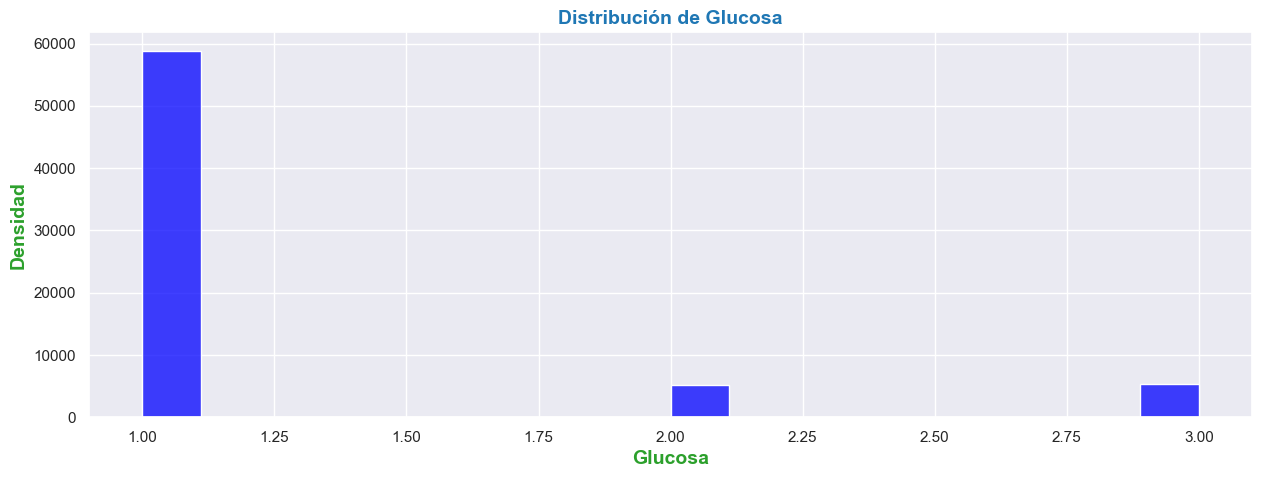

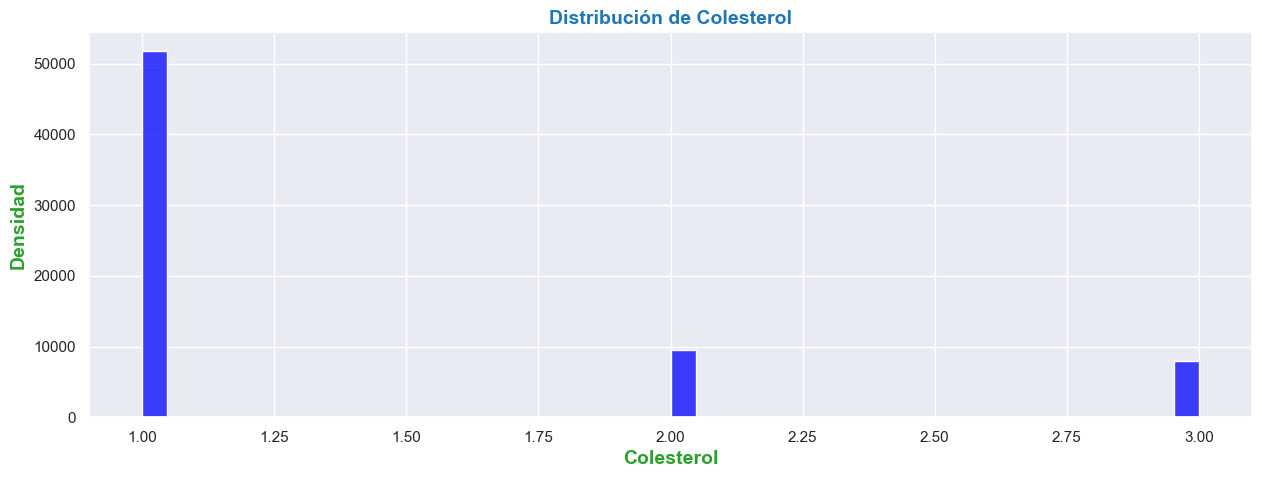

In [10]:
def parseNumero(valor):
    '''
    Función que convierte la entrada de teclado a número.

    
    Parameters
    ---------
    valor: string
        Número con formato de String que deseamos convertir a int.

    Return
    ---------
    Devuelve el número con formato numérico para poder obtener la columna del array de columnas de acuerdo a su posición.

    Raises
    ------
    ValueError
        Aparece cuando la función recive un argumento cuyo tipo es incorrecto.
    '''
    try:
        numero = int(valor)  # Intenta convertir a entero
        print("El número ingresado es:", numero)
    except ValueError:
        try:
            numero = float(valor)  # Intenta convertir a float
            print("El número ingresado es:", numero)
        except ValueError:
            print("El valor ingresado no es un número válido.")
    return(numero)

print("Hola, a continuación le mostramos un listado de todas las variables que hay. Escriba el número que aparece a la izquierda de la columna para obtener el gráfico de distribución de dicha variable")
dfColumnas = pd.Series(df.columns.values)
otro = 1

while otro != 0:
    for i in dfColumnas.index:
        print(i,dfColumnas[i])

    entrada=input()
    columnaG = parseNumero(entrada)

    while columnaG <0 or columnaG >=len(df.columns.values):
        print(f"Por favor, introduzca un número entre 0 y {len(df.columns.values)-1}")
        entrada=input()
        columnaG = parseNumero(entrada)

    #Dibuja el gráfico de la variable indicada
    graficoDispersion(dfColumnas[columnaG])

    print("Desea obtener algún otro gráfico de dispersión?")
    print("0 No")
    print("1 Si")

    entrada=input()
    otro = parseNumero(entrada)




In [12]:
print("Hola, ¿desea obtener todos los gráficos de dispersión de todas las variables, de forma más reducida?")
print("0 No")
print("1 Si")

entrada=input()
respuesta = parseNumero(entrada)

while columnaG <0 or columnaG >len(df.columns.values):
    print("Por favor, introduzca 0 si no quiere obtener los gráficos de dispersión y 1 si quiere obtenerlos")
    entrada=input()
    columnaG = parseNumero(entrada)

if respuesta ==1:
    #Definimos el tamaño de la gráfica
    fig = plt.figure(figsize=(10,10))

    #Rellenamos la gráfica con los valores deseados
    ax = fig.gca()
    df.hist(ax=ax)

    #Guardamos el gráfico en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
    plt.savefig("Gráficos de dispersión.jpg", bbox_inches='tight')
else:
    print("Perfecto, gracias")


Hola, ¿desea obtener todos los gráficos de dispersión de todas las variables, de forma más reducida?
0 No
1 Si
El número ingresado es: 0
Perfecto, gracias


Hola, ¿desea obtener el gráfico de correlación de las variables?
0 No
1 Si
El número ingresado es: 1


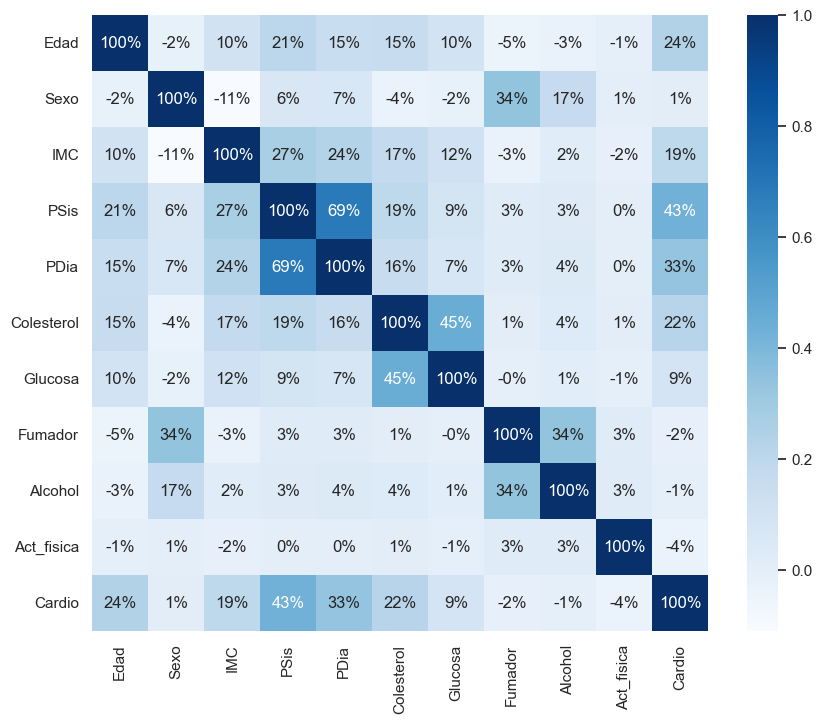

In [13]:
def graficoCorrelacion(df):
    '''
    Función que recibe el DataFrame y dibuja un gráfico de correlación de todos los atributos. También almacena el gráfico como imagen en memoria

    Parameters
    ----------    
        df : DataFrame
            DataFrame con todos los atributos.
            
    Returns
    -------
    None
    '''
    #Definimos el tamaño de la gráfica
    plt.figure(figsize=(10,8))

    #Rellenamos la gráfica con los valores deseados
    correlacion = df.corr()
    sns.heatmap(correlacion, annot=True, fmt=".0%", square=True, cmap='Blues')
    
    #Guardamos el gráfico en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
    plt.savefig("Correlación de los atributos.jpg", bbox_inches='tight')

    plt.show()


print("Hola, ¿desea obtener el gráfico de correlación de las variables?")
print("0 No")
print("1 Si")

entrada=input()
respuesta = parseNumero(entrada)

while columnaG <0 or columnaG >len(df.columns.values):
    print("Por favor, introduzca 0 si no quiere obtener los gráficos de dispersión y 1 si quiere obtenerlos")
    entrada=input()
    columnaG = parseNumero(entrada)

if respuesta ==1:
    graficoCorrelacion(df)
else:
    print("Perfecto, gracias")


In [14]:
def graficoCajas(columna):
    '''
    Función que recibe el número proporcionado por el usuario y dibuja un diagrama de cajas de la columna o columnas indicadas. También almacena el gráfico o los gráficos como imagen en memoria

    Parameters
    ----------    
        columna : int
            Número proporcionado por el usuario que indica la columna que quiere representar. En caso de que sea el mayor valor, quiere visualizar todas las columnas.
            
    Returns
    -------
    None
    '''
    if columna == len(dfColumnas):
        for column in df:
            #Definimos el tamaño de la gráfica
            plt.figure(figsize=(6,4))
            
            #Rellenamos la gráfica con los valores deseados
            df.boxplot([column])

            #Añadimos otros datos al gráfico
            plt.ylabel('Valores')

            #Guardamos el gráfico en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
            plt.savefig(f"Diagrama de cajas de la columna {column}.jpg", bbox_inches='tight')

    else:
        #Definimos el tamaño de la gráfica
        plt.figure(figsize=(6,4))
        
        #Rellenamos la gráfica con los valores deseados
        plt.boxplot(df[dfColumnas[columna]])

        #Añadimos otros datos al gráfico
        plt.xlabel(dfColumnas[columna])
        plt.ylabel('Valores')

        #Guardamos el gráfico en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
        plt.savefig(f"Diagrama de cajas de la columna {dfColumnas[columna]}.jpg", bbox_inches='tight')

    

Hola, a continuación le volvemos a mostrar el listado de todas las variables que hay. Escriba el número que aparece a la izquierda de la columna para obtener el gráfico de cajas de dicha variable
0 Edad
1 Sexo
2 IMC
3 PSis
4 PDia
5 Colesterol
6 Glucosa
7 Fumador
8 Alcohol
9 Act_fisica
10 Cardio
11 Todas
El número ingresado es: 11


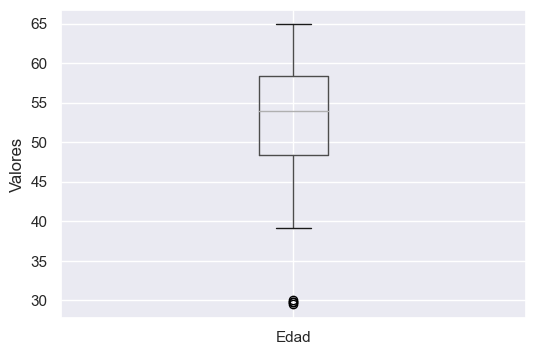

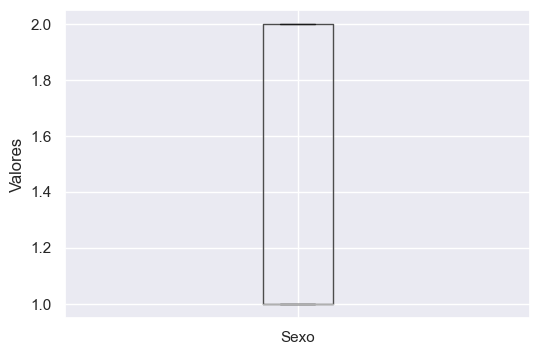

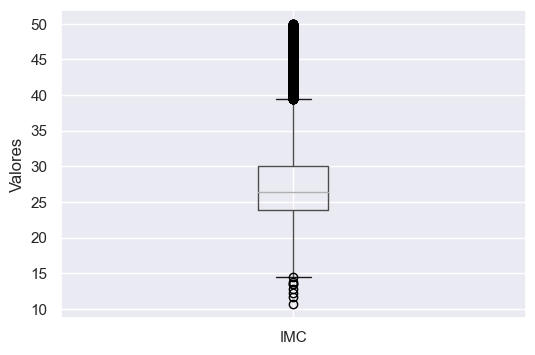

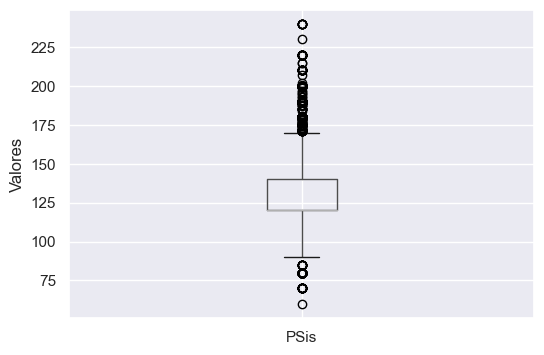

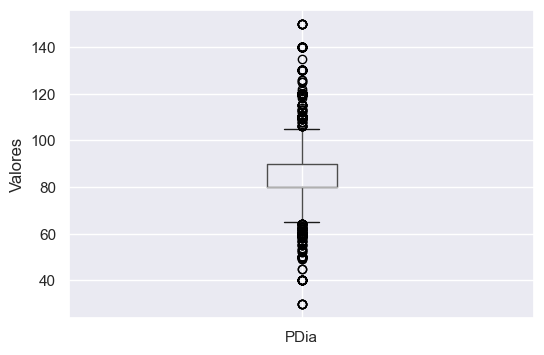

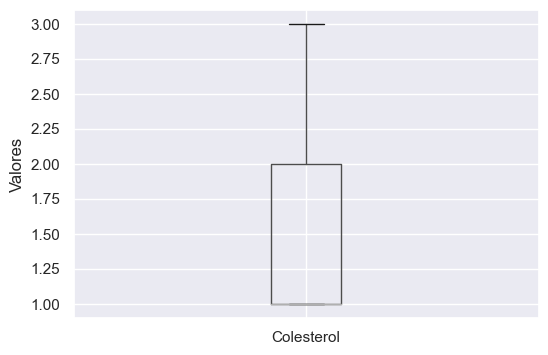

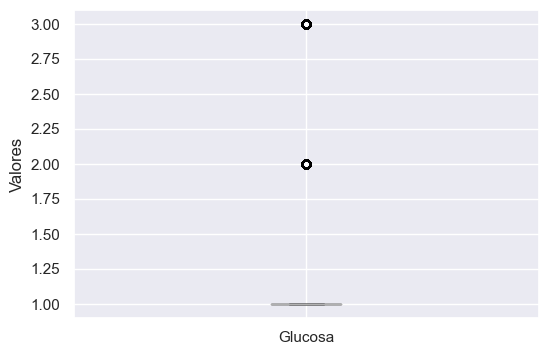

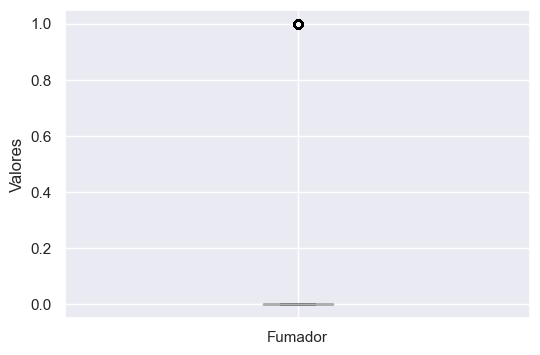

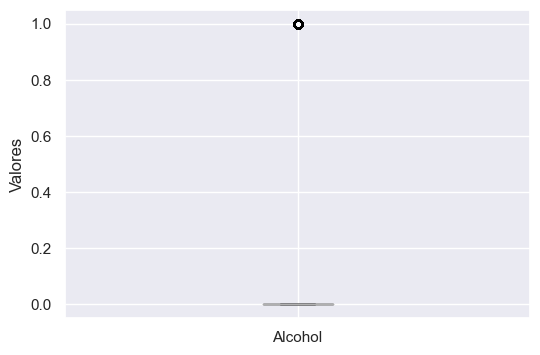

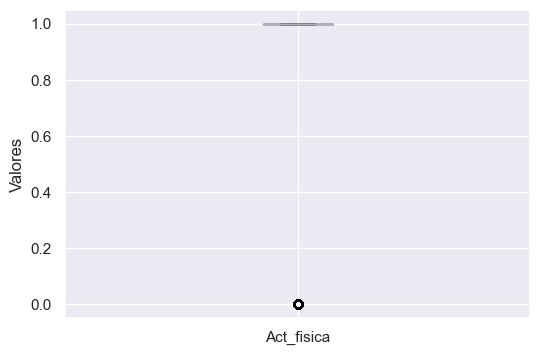

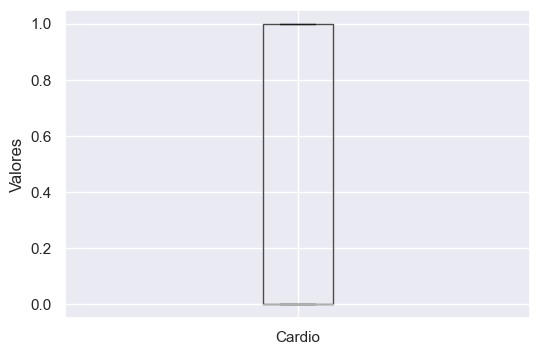

In [17]:
print("Hola, a continuación le volvemos a mostrar el listado de todas las variables que hay. Escriba el número que aparece a la izquierda de la columna para obtener el gráfico de cajas de dicha variable")
dfColumnas = pd.Series(df.columns.values)

for i in dfColumnas.index:
    print(i,dfColumnas[i])

print(f"{len(dfColumnas)} Todas")
entrada=input()
columnaG = parseNumero(entrada)

while columnaG <0 or columnaG >len(df.columns.values):
    print(f"Por favor, introduzca un número entre 0 y {len(df.columns.values)}")
    entrada=input()
    columnaG = parseNumero(entrada)


#Dibuja el gráfico de la variable indicada
graficoCajas(columnaG)


### Almacenamiento de los resultados
Hemos decidido almacenar los resultados del uso de diferentes clasificadores en un diccionario, por si se perdiera la información en mitad de la ejecución, evitar que sea necesario volver a empezar desde el principio con el tratamiento de los datos

In [18]:
import pickle
import os


def reset_dict(results_path,new_dict):
    """
    Resetea el fichero que tengamos en el disco duro con el diccionario de resultados que se indique.
    

    Parameters
    ----------
    results_path : string
        String que contiene la ruta donde se almacenará el diccionario.
    
    new_dict: dict
        Diccionario que será guardado sobreescribiendo el que ya existiese.
    
    Returns
    -------
    None
    
    """
    with open(results_path, 'wb') as handle:
        pickle.dump(new_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        

def load_results(results_path):
    """
    Recupera el diccionario a partir del fichero en el disco duro. Si no existiese el fichero, devuelve un diccionario de resultados vacío.
    
        
    Parameters
    ----------
    results_path : string
        String que contiene la ruta donde se almacenará el diccionario.
    
    
    Returns
    -------
        Diccionario con el contenido del fichero o un diccionario vacio si el fichero no existe.
    
    """
    
    results_dict = None
    if os.path.isfile(results_path):
        with open(results_path, 'rb') as handle:
            results_dict = pickle.load(handle)
            return results_dict
    else:
        return dict()

### Creación de diferentes experimentos
Hemos decidido emplear diferentes clasificadores, por lo que hemos creado un diccionario con el nombre de los clasificadores como clave, y el método como valor, para poder emplearlos de manera conjunta en posteriores ejecuciones. Hemos creado dos funciones. La primera que se emplea es `get_sklenarn_data`, que divide los datos en $X$, que es el conjunto de atributos, y en  $y$, que es el conjunto de valores de la clase. Posteriormente se emplea la función `perform_exp`, que realiza particiones aleatorias en función del número de folds que se le indique y entrena el modelo. Si el modelo ya existe en el diccionario, lo recupera, de manera que no se repiten los experimentos

In [19]:
from sklearn.model_selection import StratifiedKFold

def perform_exp(X,y,model,model_id,n_folds,results_path):
    """
    La función recupera el diccionario a partir de la ruta proporcionada en results_path
    Creamos un objeto StratifiedKFold hará tantas particiones como diga n_folds
    
    Parameters
    ----------
    X : numpy array
        El conjunto de datos completo (atributos).
    y : numpy array
        El conjunto de datos completo (clases).   
    model : 
        Un clasificador
    model_id : 
        El identificador de ese clasificador que se almacenará en el diccionario de resultados
    n_folds : 
        Número de folds de cada validación cruzada
    results_path : string
        Ruta donde se encuentra el diccionario serializado en el disco duro
    
    Returns
    -------
    Un diccionario con el contenido del fichero o un diccionario vacio si el fichero no existe
    
    Raises
    ------
    FileNotFoundError
        Aparece cuando se solicita un archivo o directorio que no existe
    """
    
    try:
        #Abro el archivo en modo lectura binaria
        with open(results_path, "rb") as file:
        # Cargar el diccionario desde el archivo utilizando pickle.load
            dic = pickle.load(file)
    except FileNotFoundError:
        dic = {}
        
    #Crea el objeto StratifiedKFold
    skf = StratifiedKFold(n_splits=n_folds, random_state = 0, shuffle =True)
    #print(model.type())

    #Divide X e y en las particiones en X_train, X_test, y_train, y_test
    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        key = (model_id, fold)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(f"Recuperando datos del modelo {model_id} para el fold Run F{fold}")
        if key in dic:
            print(f"Los datos para el modelo {model_id} y el fold {fold} ya están en el diccionario. Se recuperan del archivo")
           
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            dic[key] = (y_test, y_pred)
            with open(results_path, 'wb') as handle:
                pickle.dump(dic, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [20]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


def get_sklenarn_data(df,class_name):
    '''
    Saca X e y del dataFrame recibido.
    Con df.drop se elimina la columna no desaeada (class_name) para X, de manera que se queden solo los atributos en una variable. Posteriormente se convierte a array de numpy.\n
    y es la clase a predecir, que representa los resultados del conjunto de datos conocido.
    

    Parameters
    ----------
    df : DataFrame
        DataFrame del cual se desea separar los atributos de la clase a predecir.
    class_name : String
        Nombre de la columna que se desea eliminar, ya que es la clase a predecir.

    Returns
    -------
        X : array NumPy que se representa como una matriz de dos dimensiones, donde cada fila representa el conjunto de atributos asociados a una predicción
        y : array NumPy de una dimensión que será el valor de la variable objetivo correspondientes a cada instancia de entrenamiento en X
    '''
    # Extraer las características independientes y la clase
    X = df.drop(class_name, axis=1).to_numpy()     
    y = df[class_name].to_numpy() #me quedo tan solo con un array de de la variable indicada, en este caso el que queremos predecir
    
    #convierto un Dataframe o una Serie en un array NumPy
    
    return X, y

X,y = get_sklenarn_data(df,"Cardio") 

results_file_path = "result.dict"
folds = 5

# Borramos el diccionario para no tener resultados anteriores
reset_dict(results_file_path,dict())
# Como no existe nada, devuelve un diccionario vacio en el que no haya ninguna ejecución
res_dict = load_results(results_file_path)

#Creamos un listado con todos los clasificadores que se emplean, incluyendo su nombre y su método, que lo pasaremos a la función perform_exp
clasificadores = {'Árbol de decisión': DecisionTreeClassifier(random_state=0), 'Random Forest': RandomForestClassifier(random_state=0), 'KNN': KNeighborsClassifier(), 'Regresión Logística': LogisticRegression(max_iter = 1000), 'XGBoost': XGBClassifier(), 'MLP': MLPClassifier(), 'Extra Trees': ExtraTreesClassifier(), 'SVC': SVC()}

print("Lanzo experimentos por primera vez")
for i, j in zip(clasificadores.keys(), clasificadores.values()):
    perform_exp(X,y,j,i,folds,results_file_path)


Lanzo experimentos por primera vez
Recuperando datos del modelo Árbol de decisión para el fold Run F0
Recuperando datos del modelo Árbol de decisión para el fold Run F1
Recuperando datos del modelo Árbol de decisión para el fold Run F2
Recuperando datos del modelo Árbol de decisión para el fold Run F3
Recuperando datos del modelo Árbol de decisión para el fold Run F4
Recuperando datos del modelo Random Forest para el fold Run F0
Recuperando datos del modelo Random Forest para el fold Run F1
Recuperando datos del modelo Random Forest para el fold Run F2
Recuperando datos del modelo Random Forest para el fold Run F3
Recuperando datos del modelo Random Forest para el fold Run F4
Recuperando datos del modelo KNN para el fold Run F0
Recuperando datos del modelo KNN para el fold Run F1
Recuperando datos del modelo KNN para el fold Run F2
Recuperando datos del modelo KNN para el fold Run F3
Recuperando datos del modelo KNN para el fold Run F4
Recuperando datos del modelo Regresión Logística p

### Evaluación de la precisión de los modelos
Una vez realizados todos los folds de los modelos, hemos creado la función `get_accuracy`, que obtiene las clases reales y predichas para cada fold, evaluándolo de manera individual. Por último calcula la media de la precisión de cada fold </br>
Una vez obtenida esta función, hemos evaluado todos los modelos que hemos usado anteriormente, para determinar cual es el modelo que mejor predice

In [21]:
from sklearn.metrics import *

def get_accuracy(dict_results, model_id, n_folds):
    """
    Calcula la media de las accuracy para un clasificador en un número de folds determinado.


    Parameters
    ----------
        dict_results : dict
            Diccionario que contiene los resultados de la ejecución de distintos clasificadores en diferentes folds.
        model_id : str
            Identificador del clasificador del que se desea obtener la accuracy.
        n_folds : int
            Número total de folds.

    Returns
    ----------
        float : Media de las accuracy para el clasificador en los diferentes folds.
    """
    
    accs = []
    for i in range(n_folds):
        y_true, y_pred = dict_results[(model_id, i)]
        acc = accuracy_score(y_true, y_pred)
        accs.append(acc)
    return np.mean(accs)

def get_acc_table(results_file_path, clasificadores, folds):
    """
    Calcula la media de las accuracy para un clasificador en un número de folds determinado.


    Parameters
    ----------
        results_file_path : url
            Drección url local que indica donde se encuentra almacenado el fichero con los datos. Posteriormente lo importará y creará un diccionario a partir de ese fichero.
        clasificadores : list
            Listado de clasificadores que han sido empleados y de los cuales se desea obtener sus medias.
        n_folds : int
            Número total de folds.

    Returns
    ----------
        DataFrame : DataFrame que almacena las medias de todos los clasificadores empleados.
    """
    medias = {}
    dict = load_results(results_path=results_file_path)
    for i in clasificadores:
        medias[i] = get_accuracy(dict, i, folds)
    return pd.DataFrame(medias.items(), columns=['Cls', 'Acc'])

get_acc_table(results_file_path,clasificadores.keys(),folds)


,Cls,Acc
0,Árbol de decisión,0.638721
1,Random Forest,0.708489
2,KNN,0.694997
3,Regresión Logística,0.728474
4,XGBoost,0.732544
5,MLP,0.722183
6,Extra Trees,0.691765
7,SVC,0.725560


### Matriz de confusión
Al realizar el experimento hemos obtenido que el método que mejor clasifica los ejemplos es Regresión Logística, pero esto es cuando se realizan diferentes folds. A continuación, vamos a realizar una partición a los datos, entrenar la misma partición con todos los modelos y obtener la matriz de confusión. Para realizar la matriz de confusión hemos creado la función `representarMatriz`, que muestra la matriz de confusión y nuevamente la almacena en el ordenador, para que pueda ser visualizada y añadirla en algún informe, en caso de ser necesario


In [22]:
import itertools

def representarMatriz(modelo, matriz, clases, normalize=False):
    """
    Realiza la matriz de confusión de los datos proporcionados.


    Parameters
    --------
        modelo: string
            Nombre del modelo para mostrarlo en el título del gráfico y guardar la imagen.
        matriz : ndarray of shape (n_classes, n_classes)
            Matriz de confusión obtenida mediante el método confusion_matrix
        clases : int
            Número de clases posibles

    Returns
    --------
    None
    """
    
    titulo = "Matriz de confusión con " + modelo

    #Configuración del aspecto de la matriz de confusión
    plt.imshow(matriz, interpolation='nearest', cmap="Blues")
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=20)
    plt.yticks(tick_marks, clases)

    if normalize:
        matriz = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis]

    thresh = matriz.max() / 2.
    for i, j in itertools.product(range(matriz.shape[0]), range(matriz.shape[1])):
        plt.text(j, i, matriz[i, j], horizontalalignment="center", color="white" if matriz[i, j] > thresh else "black")

    #Configuración de la "leyenda" de la matriz
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

    #Visualización de la matriz, para evitar que se superpongan en caso de usar más de un modelo
    plt.show()

    #Guardamos la matriz de confusión en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
    plt.savefig(f"{titulo}.jpg", bbox_inches='tight')

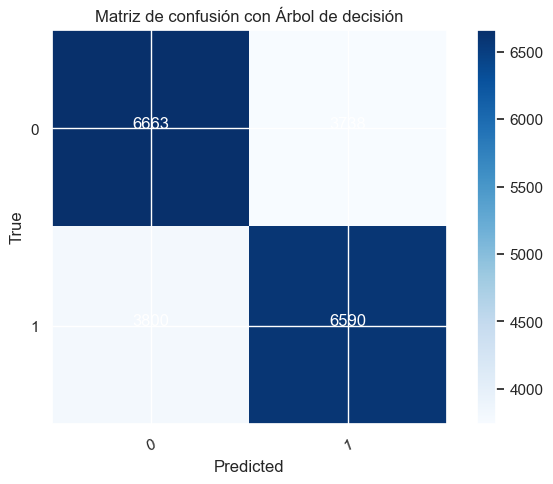

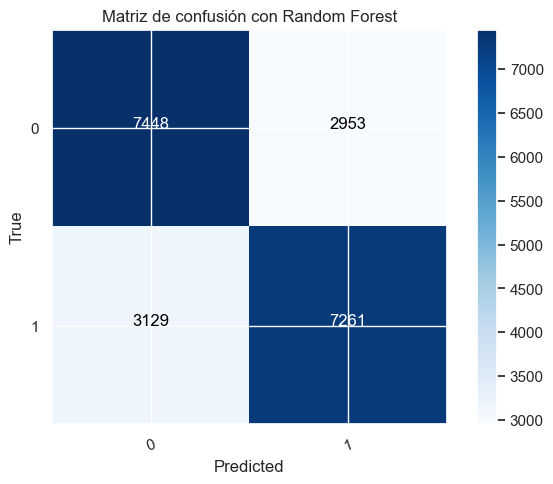

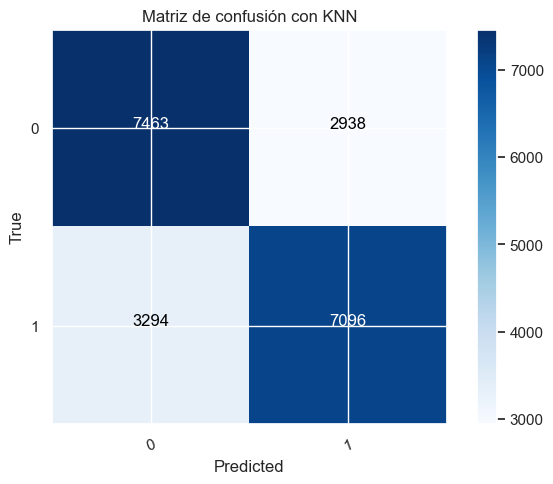

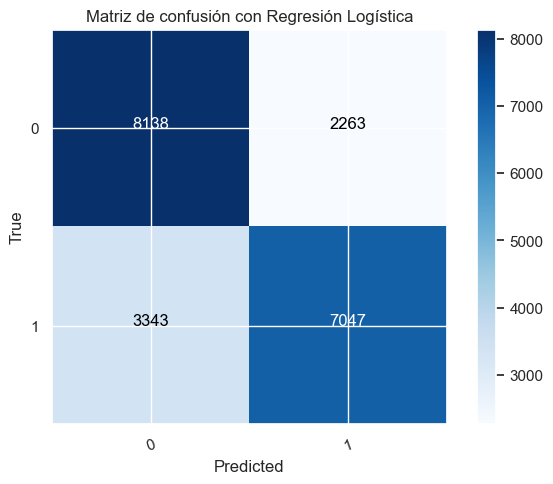

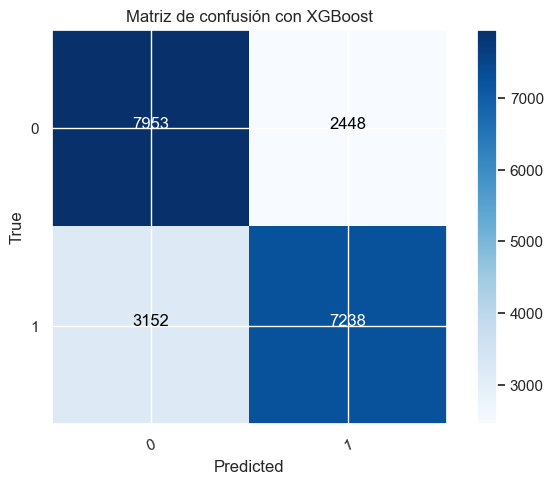

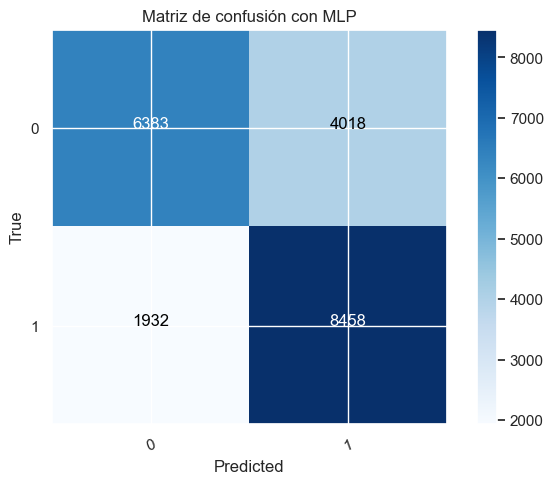

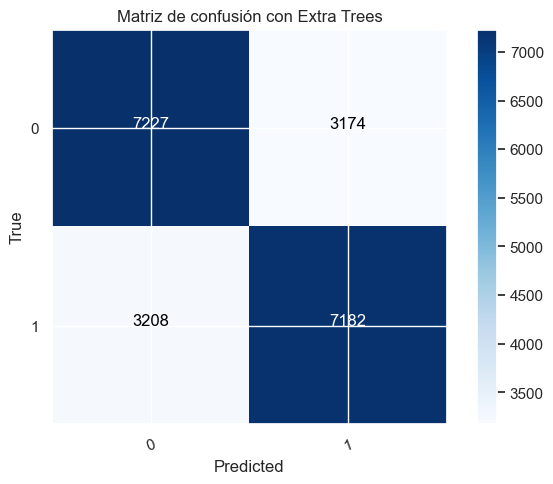

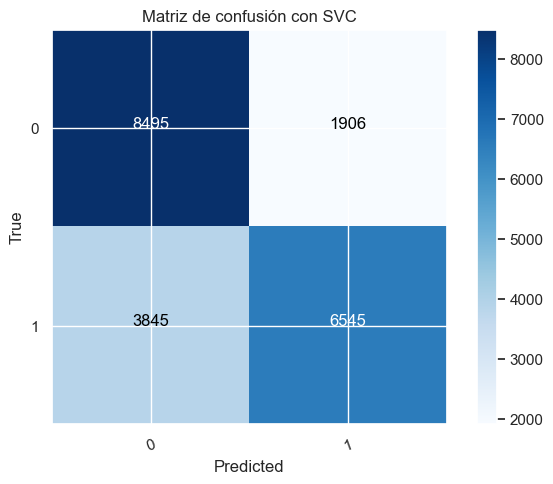

<Figure size 640x480 with 0 Axes>

In [24]:
import time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7) # 0.7, el 70% de los datos para entrenamiento
tiempos = []

for i, j in zip(clasificadores.keys(), clasificadores.values()):
    #Creo el nuevo clasificador con Regresión Logistica y calculo su precisión
    model = j
    # Entrena el modelo con el 70% de los datos
    tiempoInicio = time.time()
    model.fit(X_train, y_train)
    tiempoTotal = time.time() - tiempoInicio

    tiempos.append(tiempoTotal)

    # Evalua el modelo con el 30% restante
    y_predict = model.predict(X_test)
    accuracy_score(y_test, y_predict)

    matriz = confusion_matrix(y_test, y_predict) 
    representarMatriz(i, matriz, clases = range(2))


### Tasa de acierto de los modelos
Vamos a evaluar la precisión de los diferentes modelos para conocer la tasa de acierto. Hemos decidido que, al tratarse de una enfermedad cardíaca donde el riesgo de un error es elevado, vamos a evaluar los errores con una función propia en la cual, clasificar a una persona como NO patológica (0), cuando sí que lo es, tiene una tasa de error de 1, mientras que clasificar como patológica (1) a una persona que no lo es, tiene una tasa de error de 0,5


In [25]:
from sklearn.model_selection import cross_val_predict


def accuracy_conservadora(y_real,y_pred):
    """
    En esta función se obtiene una tasa de acierto conservadora, de manera que cuando se sobreestima el riesgo, el fallo vale la mitad (0,5).\n
    En caso de que el riesgo se infraestime, el fallo cuenta como 1.

    Parameters
    ----------
        y_real : NDArray
            Modelo proporcionado empleando un KNeighborsClassifier. No tiene ningún valor por defecto.

        y_pred : NDArray
            Conjunto de datos de test para el modelo. No tiene ningún valor por defecto.

    Returns
    ----------    
        y_pred : array con un conjunto de predicciones del clasificador indicado.

    """
    errores_sobreestimacion = sum([1 for y_real, y_pred in zip(y_real, y_pred) if y_real < y_pred]) # Cuenta las predicciones que sobreestimaron
    errores_infraestimacion = sum([1 for y_real, y_pred in zip(y_real, y_pred) if y_real > y_pred]) # Cuenta las predicciones que infraestimaron
    accuracyCalculada = errores_infraestimacion + 0.5*errores_sobreestimacion
    return 1-(accuracyCalculada/len(y_real))


def evalua(X,y,clasificador,folds):
    """
    Evalua el clasificador indicado, usando el número de folds indicado, los atributos X y la clase y. Devuelve accuracy_score y accuracy_conservadora
    
    En esta función se obtiene una tasa de acierto conservadora, de manera que cuando se sobreestima el riesgo, el fallo vale la mitad (0,5).\n
    En caso de que el riesgo se infraestime, el fallo cuenta como 1.

    Parameters
    ----------
        X : DataFrame
            Atributos independientes. Son los datos que se van a entrenar.

        y : Series
            Conjunto de resultados que se intentarán predecir.
        
        clasificador : Objeto `estimator` que implemente los métodos 'fit' y 'predict'
            Objeto usado para entrenar los datos.

        folds : int
            Determina el número de divisiones de la validación cruzada.

    Returns
    ----------    
        precision : int
            Precisión de acierto en escala de 0 a 1, siendo 0 el valor más bajo y 1 el valor más alto. Todos los errores valen lo mismo
        
        precision_conservadora : int
            Precisión de acierto en escala de 0 a 1, siendo 0 el valor más bajo y 1 el valor más alto. Cuando se sobreestima el riesgo, el fallo vale la mitad (0,5).

    """
    prediccion = cross_val_predict(clasificador, X, y, cv=folds)
    precision = accuracy_score(y, prediccion)
    precision_conservadora = accuracy_conservadora(y, prediccion)
    return precision, precision_conservadora


In [26]:
import warnings

def evaluar_clasificadores(X, y, folds):
    """
    Evalua todos los clasificadores, usando el número de folds indicado, los atributos X y la clase y. Devuelve accuracy_score y accuracy_conservadora
    
    En esta función se obtiene una tasa de acierto conservadora, de manera que cuando se sobreestima el riesgo, el fallo vale la mitad (0,5).\n
    En caso de que el riesgo se infraestime, el fallo cuenta como 1.

    Parameters
    ----------
        X : DataFrame
            Atributos independientes. Son los datos que se van a entrenar.

        y : Series
            Conjunto de resultados que se intentarán predecir.
        
        folds : int
            Determina el número de divisiones de la validación cruzada.

    Returns
    ----------    
        Resultados : dict
            Conjunto de resultados de todos los clasificadores.

    """
    resultados = {}
    warnings.filterwarnings("ignore")
    for i, j in zip(clasificadores.keys(), clasificadores.values()):
        resultados[i]= evalua(X, y, j, folds)
        
    return resultados

resultados = pd.DataFrame(evaluar_clasificadores(X, y, 5))

Mostramos la tabla con las precisiones y el tiempo de ejecución

In [28]:
tabla = resultados.transpose()
tabla.columns = ['Puntuación', 'Puntuación conservadora']
tabla['Tiempo'] = tiempos
display(tabla)

,Puntuación,Puntuación conservadora,Tiempo
Árbol de decisión,0.637148,0.728049,0.190516
Random Forest,0.708027,0.778704,6.687086
KNN,0.697335,0.769289,0.123697
Regresión Logística,0.727955,0.782637,0.705137
XGBoost,0.733568,0.790183,0.880615
MLP,0.725487,0.775371,8.798461
Extra Trees,0.693107,0.769094,4.530902
SVC,0.725617,0.771612,62.225564


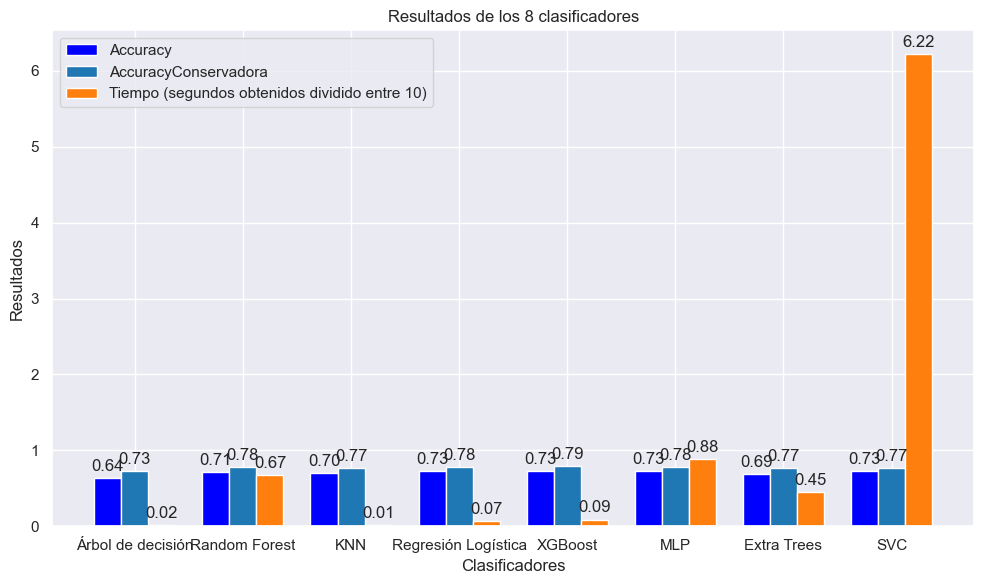

In [29]:
#Valores de las barras

resultados2 = tabla.transpose()

resultadosAcc = [r[1][0].round(2) for r in resultados2.items()]
resultadosAcc_c = [r[1][1].round(2) for r in resultados2.items()]
tiempos = [r[1][2].round(2)/10 for r in resultados2.items()]

#Configuración del gráfico
fig, ax = plt.subplots(figsize=(10,6))

#Eje X
barra = 0.25
abscisas = resultados2.keys()
x = np.arange(len(abscisas))

#Genero las barras para cada conjunto de datos
recta1 = ax.bar(x-2*barra/3, resultadosAcc, color = 'blue', width=barra, label='Accuracy')
recta2 = ax.bar(x+barra/3, resultadosAcc_c, color = 'tab:blue', width=barra, label='AccuracyConservadora')
recta3 = ax.bar(x+4*barra/3, tiempos, color = 'tab:orange', width=barra, label='Tiempo (segundos obtenidos dividido entre 10)')

#Agregar etiquetas de texto y título
ax.set_xlabel('Clasificadores')
ax.set_ylabel('Resultados')
ax.set_title(f'Resultados de los {len(clasificadores)} clasificadores')
ax.set_xticks(np.arange(len(clasificadores)) + barra / 3)
ax.set_xticklabels(clasificadores)
ax.legend()

#Agregar valores de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(recta1)
autolabel(recta2)
autolabel(recta3)


#Ajustar la figura
plt.tight_layout()

#Mostrar gráfico
plt.show()